In [1]:
import sys
sys.path.append('/source/main')

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
from sklearn.model_selection import train_test_split

from utils import text_utils
RANDOM_STATE = 42

In [3]:
with open('/dataset/vietnamese_tone_prediction/train.txt', 'rt', encoding='utf-8') as i_f:
    lines = i_f.readlines()

In [4]:
len(lines)

2126280

In [5]:
lines = list(set(lines))

In [6]:
len(lines)

1814325

# Remove all non-diacritics text

In [7]:
df = pd.DataFrame({'src': lines})

In [8]:
df['tgt'] = df['src'].map(text_utils.remove_tone_line)

In [9]:
df.shape

(1814325, 2)

In [10]:
df = df[df['src'] != df['tgt']]

In [11]:
df.shape

(1541381, 2)

# Split train, eval, test

In [12]:
lines = list(df['src'])

In [13]:
len(lines)

1541381

In [14]:
train, test = train_test_split(lines, test_size=10000, random_state=RANDOM_STATE)

In [15]:
val, test = train_test_split(test, test_size=5000, random_state=RANDOM_STATE)

In [16]:
len(val)

5000

In [17]:
len(test)

5000

In [18]:
len(train)

1531381

In [19]:
train[:3]

['Nhiều trường hợp ở các tỉnh miền Trung, vùng miền núi xa xôi đi lại khó khăn như quê tôi nhưng cũng đã được các tổ chức đưa các liệt sỹ về quê một cách an toàn, chu đáo.\n',
 'Jeerigepete là một làng thuộc tehsil Gauribidanur, huyện Chikkaballapur, bang Karnataka, Ấn Độ.\n',
 'Ông Bảy chia sẻ: Sự vất vả của tôi, có phần đóng góp công rất lớn của bà xã.\n']

In [20]:
test[:3]

['Sau đó hai người cùng ăn tối, Sousuke tặng cô một chiếc cốc nhân ngày sinh nhật của cô đồng thời mong cô đến ở cùng với mình.\n',
 'Doanh nghiệp ra quân đầu năm Sau mấy ngày nghỉ tết, nhiều đơn vị, doanh nghiệp (DN) lại khẩn trương vào ca, ra quân sản xuất đầu năm với khí thế mới.\n',
 'Sang năm 598 TCN, Sở Trang vương lại đánh Trịnh.\n']

In [21]:
val[:3]

['Trong giai đoạn tham chiến, ông luôn phản ứng chậm chạp với những mệnh lệnh của thiếu tướng John Pope và bị ép chỉ huy cuộc tấn công trong tâm thế chưa chuẩn bị đầy đủ, nên đã gây tổn thất lớn cho quân đội.\n',
 'Mặc dù nếu xét về nhiều khía cạnh, ví dụ như trang bị vũ khí nghèo nàn, binh lính không được huấn luyện tử tế cộng với tướng tá yếu kém, lực lượng này rõ ràng là đối thủ dưới cơ của các quân đoàn La Mã.\n',
 'Hơn nữa hàng hậu vệ của MU đang có những chấn thương hàng loạt và có lúc Sir Alex còn phải sử dụng cả những tiền vệ như Darren Fletcher, Michael Carrick về làm hậu vệ.\n']

In [22]:
with open('/dataset/vietnamese_tone_prediction/my_train.txt', 'wt', encoding='utf-8') as o_f:
    o_f.writelines(train)
with open('/dataset/vietnamese_tone_prediction/my_eval.txt', 'wt', encoding='utf-8') as o_f:
    o_f.writelines(val)
with open('/dataset/vietnamese_tone_prediction/my_test.txt', 'wt', encoding='utf-8') as o_f:
    o_f.writelines(test)
print('Done')

Done


# Validating

In [23]:
with open('/dataset/vietnamese_tone_prediction/test.txt', 'rt', encoding='utf-8') as i_f:
    btc_test = i_f.readlines()
btc_test = [l[4:] for l in btc_test]
df_btc_test = pd.DataFrame({0: btc_test})

with open('/dataset/vietnamese_tone_prediction/my_test.txt', 'rt', encoding='utf-8') as i_f:
    my_test = i_f.readlines()
df_my_test = pd.DataFrame({0: my_test})

df_btc_test['len'] = df_btc_test[0].map(len)
df_my_test['len'] = df_my_test[0].map(len)

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

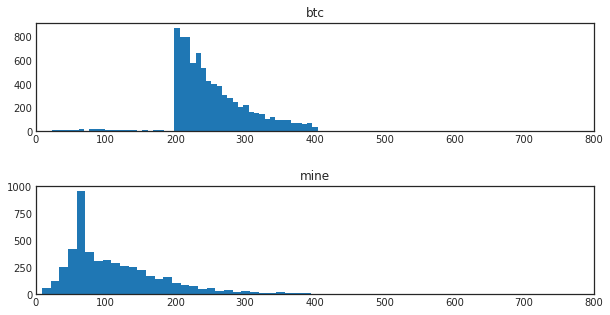

In [25]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.5)
ax = fig.add_subplot(2, 1, 1)
ax.hist(df_btc_test['len'], bins=100)
ax.set(title='btc', xlim=(0, 800))

ax = fig.add_subplot(2, 1, 2)
ax.hist(df_my_test['len'], bins=100)
ax.set(title='mine', xlim=(0, 800))

plt.show()

## Comment
Length distribution of given test set is far different from given train

--> We need an adjustment to align our test with given test

In [26]:
df_btc_test['len'].describe()

count    8240.000000
mean     251.099879 
std      55.465485  
min      8.000000   
25%      215.000000 
50%      239.000000 
75%      280.000000 
max      770.000000 
Name: len, dtype: float64

In [27]:
df_btc_test[df_btc_test['len']<200].shape[0]/df_btc_test.shape[0]

0.028033980582524272

In [28]:
df_btc_test[df_btc_test['len']>400].shape[0]/df_btc_test.shape[0]

0.0007281553398058253

# Re-split train, test, eval

In [29]:
df['len'] = df['src'].map(len)

In [30]:
df.shape

(1541381, 3)

In [31]:
df[df['len'] > 200].shape

(197130, 3)

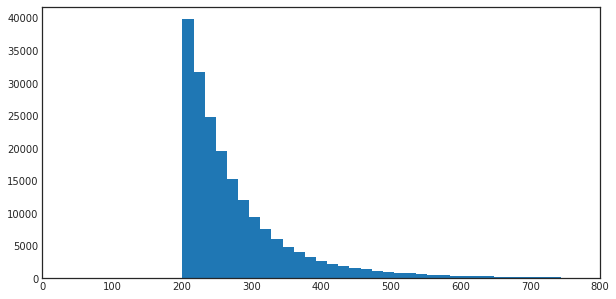

In [32]:
plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.hist(df[df['len'] > 200]['len'], bins=500)
ax.set(xlim=(0, 800))
plt.show()

In [33]:
test_eval = df[(df['len'] > 200) & (df['len']<400)].sample(int(10000*(1-0.028-0.0007)))\
                .append(df[df['len']<=200].sample(int(10000*0.028)))\
                .append(df[df['len']>400].sample(int(10000*0.0007)))

In [34]:
test_eval_docs = set(list(test_eval['src']))
train_docs = set(df['src']) - test_eval_docs

In [35]:
train_docs = list(train_docs)
test_eval_docs = list(test_eval_docs)

In [36]:
test_docs, eval_docs = train_test_split(test_eval_docs, test_size=0.5, random_state=RANDOM_STATE)

In [37]:
with open('/dataset/vietnamese_tone_prediction/my_train.txt', 'wt', encoding='utf-8') as o_f:
    o_f.writelines(train_docs)
with open('/dataset/vietnamese_tone_prediction/my_eval.txt', 'wt', encoding='utf-8') as o_f:
    o_f.writelines(eval_docs)
with open('/dataset/vietnamese_tone_prediction/my_test.txt', 'wt', encoding='utf-8') as o_f:
    o_f.writelines(test_docs)
print('Done')

Done


In [38]:
with open('/dataset/vietnamese_tone_prediction/test.txt', 'rt', encoding='utf-8') as i_f:
    btc_test = i_f.readlines()
btc_test = [l[4:] for l in btc_test]
df_btc_test = pd.DataFrame({0: btc_test})

with open('/dataset/vietnamese_tone_prediction/my_test.txt', 'rt', encoding='utf-8') as i_f:
    my_test = i_f.readlines()
df_my_test = pd.DataFrame({0: my_test})

df_btc_test['len'] = df_btc_test[0].map(len)
df_my_test['len'] = df_my_test[0].map(len)

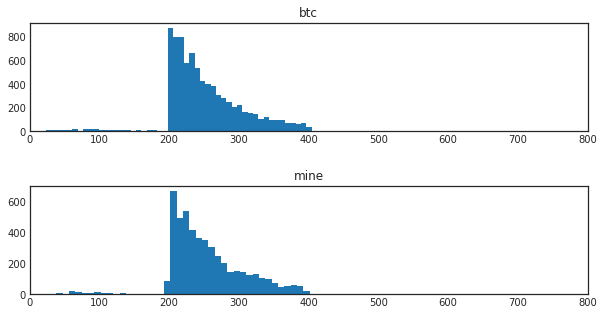

In [39]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.5)
ax = fig.add_subplot(2, 1, 1)
ax.hist(df_btc_test['len'], bins=100)
ax.set(title='btc', xlim=(0, 800))

ax = fig.add_subplot(2, 1, 2)
ax.hist(df_my_test['len'], bins=100)
ax.set(title='mine', xlim=(0, 800))

plt.show()

In [40]:
print('Pretty')

Pretty
